# Assignment 04


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import geopandas as gpd

In [2]:
datasets_dir = Path('../../../datasets')
# ls ../../

In [3]:
datasets_dir

WindowsPath('../../../datasets')

In [4]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

..\..\..\datasets\moscow\moscow_vectors\Moscow.gdb
<class 'pathlib.WindowsPath'>


In [5]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [6]:
import fiona
moscow = moscow_gdb
fiona.listlayers(moscow)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [7]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [8]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

### Shapely geometries
Behind the scenes, geopandas is reading in vector data, storing the attribute tables as `pandas` dataframes,
and storing the vector geometry as `shapely` geometries.


### Reading:
To become more familiar with vector operations in geopandas/shapely, 
read this introduction to shapely geometries carefully, 
and reproduce/experiment with the code in this reading from within a blank notebook:
https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

Read this page for a more comprehensive description of `shapely` geometries: 
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

Scroll through the `shapely` user manual (https://shapely.readthedocs.io/en/stable/manual.html), 
reviewing the different functions that shapely includes.  `geopandas` allows all of these functions to be
executed, [directly through `geopandas`, without explicit call to `shapely`](https://geopandas.org/docs/user_guide/geometric_manipulations.html).  `shapely` is just running
quietly under the hood.  Pay specific attention to the "Spatial Analysis Methods" of the manual.

In [9]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1), (2, 0)])
print('Line area =', line.area)
print('Line length =', line.length)

Line area = 0.0
Line length = 2.8284271247461903


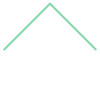

In [10]:
line

In [11]:
type(line)

shapely.geometry.linestring.LineString

In [12]:
print( list(line.coords) )
print( line.coords[2] )

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)]
(2.0, 0.0)


<div class="alert alert-block alert-warning">

## 1. Shapely geometries
What `shapely` geometry are each of the parcels in the Moscow parcels layer? What `shapely` geometry are their centroids?
    
Find the Kenworthy Theater within the parcels database (hint: the name field for its mailing address, 
    PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR").
What are the coordinates for the corners of its parcel?    
</div>


In [13]:
parcels = gpd.read_file(moscow, layer='Parcels')
p_geom_type = parcels.geom_type # shapely geometry type is MultiPolygon
p_geom_type
print('The geometry type is' , p_geom_type[0])

The geometry type is MultiPolygon


In [14]:
c_geom_type = parcels.centroid.geom_type   #shapely geometry type is Point
c_geom_type
print('The geometry type is' , c_geom_type[0])

The geometry type is Point


In [15]:
kenloc = parcels.iloc[1359] #print just row with info on Kenworthy Performing Arts Ctr
kenloc

LABEL                                                        002B
PM_PAR_14                                          RPM0001005002B
PM_MAIL_NM                          KENWORTHY PERFORMING ARTS CTR
PM_MAIL_A1                                             508 S MAIN
PM_MAIL_A2                                                       
PM_MAIL_CT                                                 MOSCOW
PM_MAIL_ST                                                     ID
PM_MAIL_ZP                                                83843.0
PM_PROP_AD                                             508 S MAIN
PM_DEEDCDT                                             20010202.0
PM_DEEDRF1                                                 455001
PM_DEEDRF2                                                 448268
PM_DEEDRF3                                                       
PM_DEEDRF4                                                       
PM_DEEDRF5                                                       
PM_TAX_AMT

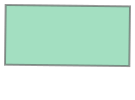

In [16]:
ken_poly = kenloc['geometry'] #show the geometry of the Kenworthy Art Center
ken_poly

In [17]:
print('The centroid of the polygon is', np.array(ken_poly.centroid), 'degrees') #centroid of the polygon

The centroid of the polygon is [2310974.1154892  1848502.57787332] degrees


In [18]:
#bounds of the lower left and upper right corners
ken_bounds = ken_poly.bounds # in degrees
ken_bounds
print('The lower left coordinates are', ken_bounds[0:2], 'degrees')
print('The upper right coordinates are', ken_bounds[2:5], 'degrees')

The lower left coordinates are (2310911.285070244, 1848471.8833809048) degrees
The upper right coordinates are (2311036.9459081627, 1848533.2723657414) degrees


In [19]:
parcels.crs #verifying that coordinate system is in degrees of lat/long

<Projected CRS: EPSG:2243>
Name: NAD83 / Idaho West (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Idaho - counties of Ada; Adams; Benewah; Boise; Bonner; Boundary; Canyon; Clearwater; Elmore; Gem; Idaho; Kootenai; Latah; Lewis; Nez Perce; Owyhee; Payette; Shoshone; Valley; Washington.
- bounds: (-117.24, 41.99, -114.32, 49.01)
Coordinate Operation:
- name: SPCS83 Idaho West zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
ken_bounds 

(2310911.285070244, 1848471.8833809048, 2311036.9459081627, 1848533.2723657414)

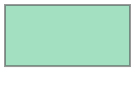

In [21]:
#creating a copy of the Kenworthy Theater parcel to extract the coordinates
from shapely.geometry import box
min_x, min_y = 2311036.9459081627, 1848533.2723657414
max_x, max_y = 2310911.285070244, 1848471.8833809048

new_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
new_poly

In [22]:
#finding and printing the coordinates of the perimeter of the 
#polygon in an np.array while exluding the last value as it is a repeat of the first value
corner_coords = np.array(new_poly.exterior.coords[:-1])
corner_coords #units are in degrees

array([[2310911.28507024, 1848533.27236574],
       [2310911.28507024, 1848471.8833809 ],
       [2311036.94590816, 1848471.8833809 ],
       [2311036.94590816, 1848533.27236574]])

FACILITYID                                               PR-E17-G
NAME                                                Ghormley Park
SUBTYPEFIELD                                                    0
FEATURECODE                                                      
FULLADDR                                              504 Home St
OPERDAYS                                                         
OPERHOURS                                                        
PARKAREA                                                     7.34
PARKURL         https://www.ci.moscow.id.us/parks-rec/parks/Pa...
NUMPARKING                                                    0.0
RESTROOM                                                      Yes
ADACOMPLY                                                        
CAMPING                                                        No
SWIMMING                                                       No
HIKING                                                         No
FISHING   

<AxesSubplot:>

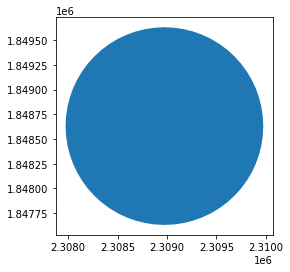

In [23]:
i = 2 # Look at one park, for example
print(parks.iloc[i])

buffer_radius = 1000 # What are the units for this?

buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    #If you use just one index, it seems to remove all the geopandas properties of the data
buffered_park.plot()


In [24]:
parks.crs
print('Units are in feet')

Units are in feet


<div class="alert alert-block alert-warning">

## 2. Identifying Moscow residents underserved by city parks.
You're an urban planner consulting with the City of Moscow.  The city is interested in increasing the number of parks
    within the city, and better designing those parks to meet the needs of those who are currently underserved
    by the city's existing parks.  The city wants to begin the planning process by reaching out to these currently
    underserved residents, but first the city needs to know who they are.
    
The city asks you to produce a list of all resident addresses within the city limits whose property is at least 1000 feet
    from a current park.
    
To properly address the letters and questionaires that the city will be sending out, the city would like this list
    of residents as a csv file, with each property address on a separate line (property addresses are represented within
    the parcels database by the field name "PM_PROP_AD").  Produce this file and a map of the underserved parcels.
    


</div>

In [25]:
%matplotlib widget

fig, ax = plt.subplots()
parks.buffer(buffer_radius).plot(ax=ax, color='g', zorder = 2)
#city_limits.plot(ax=ax, color=None, edgecolor='r')
roads.plot(ax=ax, zorder = 1, color = 'w')
parcels.plot(ax=ax)


ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1837691.7277759165, 1858582.946164012)

In [26]:
circle = parks.buffer(buffer_radius)

In [27]:
#pull all polygons(parcels) that do NOT intersect with the buffered circles
all_holes = parcels['geometry'].difference(circle) 
all_holes

C:\Users\12087\Documents\Anaconda\envs\GISenv21b\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       POLYGON ((2310895.129 1842403.524, 2311062.969...
1       POLYGON ((2311059.420 1842229.329, 2311059.239...
2       POLYGON ((2313927.891 1843762.528, 2314047.876...
3       POLYGON ((2310936.696 1850758.583, 2310937.107...
4       POLYGON ((2310938.447 1850916.273, 2311056.440...
                              ...                        
7389                                                 None
7390                                                 None
7391                                                 None
7392                                                 None
7393                                                 None
Length: 7394, dtype: geometry

In [28]:
all_holes.plot() 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [29]:
#pull out polygon coordinates that are in union with all_holes
parcel_info_all = parcels.union(all_holes) 
parcel_info_all

0       POLYGON ((2310895.129 1842403.524, 2311062.969...
1       POLYGON ((2311059.420 1842229.329, 2311059.239...
2       POLYGON ((2313927.891 1843762.528, 2314047.876...
3       POLYGON ((2310936.696 1850758.583, 2310937.107...
4       POLYGON ((2310938.447 1850916.273, 2311056.440...
                              ...                        
7389                                                 None
7390                                                 None
7391                                                 None
7392                                                 None
7393                                                 None
Length: 7394, dtype: geometry

In [30]:
#exclude all lines that have None as a field
parcel_info = parcel_info_all != None
p_info = parcel_info_all.loc[parcel_info]
p_info

0     POLYGON ((2310895.129 1842403.524, 2311062.969...
1     POLYGON ((2311059.420 1842229.329, 2311059.239...
2     POLYGON ((2313927.891 1843762.528, 2314047.876...
3     POLYGON ((2310936.696 1850758.583, 2310937.107...
4     POLYGON ((2310938.447 1850916.273, 2311056.440...
5     POLYGON ((2306087.327 1849437.908, 2306106.535...
6     POLYGON ((2306106.913 1849387.558, 2306106.725...
7     POLYGON ((2316147.920 1849168.615, 2316146.975...
8     POLYGON ((2316146.889 1848991.434, 2316146.348...
9     POLYGON ((2311551.527 1850289.429, 2311549.450...
10    POLYGON ((2311549.450 1850102.311, 2311547.531...
11    POLYGON ((2325470.763 1851983.735, 2325466.340...
12    POLYGON ((2302547.546 1849021.482, 2302852.534...
13    POLYGON ((2305515.878 1849966.681, 2305515.742...
14    POLYGON ((2305515.742 1849958.535, 2305508.631...
15    POLYGON ((2305481.539 1848079.670, 2305481.418...
16    POLYGON ((2305463.039 1846869.327, 2305417.880...
17    POLYGON ((2303559.752 1848124.237, 2303496

In [31]:
#print the PM_PROP_AD column in the parcels dataframe
address_col = parcels['PM_PROP_AD']
address_col

0                  
1                  
2       1810 LORIEN
3        328 N MAIN
4        340 N MAIN
           ...     
7389               
7390               
7391               
7392               
7393               
Name: PM_PROP_AD, Length: 7394, dtype: object

In [32]:
#Because the p_info only goes to line 42, the addresses that are 1000ft away from a park are through line 42
address_out_1000ft = address_col[0:43]

In [33]:
address_out_1000ft

0                          
1                          
2               1810 LORIEN
3                328 N MAIN
4                340 N MAIN
5                 109 SHORT
6                          
7                1562 E 3RD
8                1573 E 3RD
9           227 N JEFFERSON
10          203 N JEFFERSON
11    4701 ROBINSON PARK RD
12                         
13                 120 FARM
14        1516 W PULLMAN RD
15                         
16                         
17                         
18                  603 W A
19                  613 W A
20                  625 W A
21                  617 W A
22                         
23                         
24                115 SHORT
25                114 SHORT
26                108 SHORT
27        1244 W PULLMAN RD
28        1212 W PULLMAN RD
29        1104 W PULLMAN RD
30        1104 W PULLMAN RD
31             116 W MORTON
32               623 N MAIN
33               707 N MAIN
34             214 W MORTON
35               521

In [35]:
import pandas as pd #changing list to dataframe
df_addresses = pd.DataFrame(address_out_1000ft)

In [36]:
type(df_addresses)

pandas.core.frame.DataFrame

In [37]:
df_addresses.to_csv('address_out_1000ft.csv') #changing dataframe to csv file

In [37]:
df_addresses

,PM_PROP_AD
0,
1,
2,1810 LORIEN
3,328 N MAIN
4,340 N MAIN
5,109 SHORT
6,
7,1562 E 3RD
8,1573 E 3RD
9,227 N JEFFERSON


In [38]:
address_out_1000ft.to_csv('addresses_csv')

In [38]:
roads

,CENTERLINEID,FROMLEFT,TOLEFT,FROMRIGHT,TORIGHT,FULLNAME,FEDROUTE,FEDRTETYPE,AFEDRTE,AFEDRTETYPE,...,SLOPE,OCI2017,OCI2014,GlobalID,FACILITYID,OCI2019,OCI2020,ADTID,SHAPE_Length,geometry
0,02600,0.0,0.0,0.0,0.0,MAIN ST,None,Other,None,None,...,NaN,58.92,71.66,{E10997BF-346F-493B-9078-ABF3BA07D894},STREET-02600,96.08,96.08,F19-05,87.664841,"MULTILINESTRING ((2310851.729 1847250.622, 231..."
1,01430,0.0,0.0,0.0,0.0,FIRST ST,None,Other,None,None,...,NaN,90.93,98.96,{F2D06156-E244-4542-A0A7-9F47285F09AF},STREET-01430,86.04,86.04,G16-05,349.983212,"MULTILINESTRING ((2310883.550 1849572.726, 231..."
2,02670,102.0,114.0,105.0,205.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{BF94EEC2-9DBF-42FD-8BA0-31C170DEC8CB},STREET-02670,80.02,80.02,F17-12,230.721479,"MULTILINESTRING ((2310883.464 1849564.375, 231..."
3,02660,204.0,218.0,205.0,221.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{E4ADA45C-08D8-4C70-B30F-46E1097647A3},STREET-02660,80.02,80.02,F17-06,239.999980,"MULTILINESTRING ((2310880.869 1849333.668, 231..."
4,02650,302.0,318.0,301.0,307.0,MAIN ST,None,Other,None,None,...,NaN,91.97,100.00,{D3CE1840-EC8C-4124-AAEF-4A67AB2B5415},STREET-02650,95.17,95.17,F17-07,240.667684,"MULTILINESTRING ((2310878.196 1849093.683, 231..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,00301,1600.0,1756.0,1601.0,1751.0,THIRD ST,None,Other,None,None,...,5.0,NaN,NaN,{CE44A217-E6DA-4168-A8A9-C28AD394A399},STREET-00301,NaN,NaN,None,756.596825,"MULTILINESTRING ((2316177.219 1849043.781, 231..."
2214,13760,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{588D3E9B-7CBE-48D5-94BF-0DB57D0E0442},STREET-13760,NaN,NaN,None,706.800143,"MULTILINESTRING ((2312049.540 1843770.847, 231..."
2215,13765,NaN,NaN,NaN,NaN,SUNNY CT,None,None,None,None,...,7.0,NaN,NaN,{2F896E18-E40F-4BD6-81D2-5DDD91482100},STREET-13765,NaN,NaN,None,173.316937,"MULTILINESTRING ((2312699.813 1843557.137, 231..."
2216,13770,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{4BAB6FC8-B24E-49A0-B852-9AF25FD43BF2},STREET-13770,NaN,NaN,None,221.456644,"MULTILINESTRING ((2312699.813 1843557.137, 231..."


In [39]:
zoning.columns

Index(['LANDUSECODE', 'LANDUSEDESC', 'BASEELEV', 'HEIGHT', 'LASTUPDATE',
       'LASTEDITOR', 'SUBTYPECODE', 'SUBTYPEDESC', 'PARCELID', 'ADDRESS',
       'LOCDESC', 'GlobalID', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [40]:
zoning['LANDUSEDESC'].unique()

array(['Auto-Urban Residential', 'University',
       'Parks, Recreation, and Open Space',
       'Auto-Urban Residential, Medium Density', 'Urban Commercial',
       'Urban Residential, Medium Density', 'Urban Residential',
       'Suburban Residential', 'Public and Semi-Public',
       'Auto-Urban Commercial', 'Vacant', 'Auto-Urban Industrial',
       'Agricultural', 'Research/Technology Park', '',
       'Suburban Commercial'], dtype=object)

In [41]:
zoning['LANDUSECODE'].unique()

array(['111', '750', '800', '109', '250', '115', '110', '120', '700',
       '200', '11', '400', '900', '999', '0', '150', None], dtype=object)

In [42]:
# We can measure the distance between any parcel and a point near the center of downtown Moscow
from shapely.geometry import Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.849e6))

#### Visualizing the data
I think each of the plots below is interesting.  Try commenting and uncommenting each one

In [52]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )

# These are a few of the interesting plots to look at.
#parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280);
zoning.plot(column='LANDUSEDESC', ax=ax, legend=True, cmap='tab20')
#parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

### Property sales over time
Similar to the assignment from last week, we can look at the property sales as a function of time.

In [46]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')


0    20120925.0
1    20120925.0
2           0.0
3    20190815.0
Name: PM_DEEDCDT, dtype: object


In [47]:
parcels['SaleDate']

0      2012-09-25
1      2012-09-25
2             NaT
3      2019-08-15
4      2019-08-15
          ...    
7389          NaT
7390          NaT
7391          NaT
7392          NaT
7393          NaT
Name: SaleDate, Length: 7394, dtype: datetime64[ns]

In [49]:
dates = parcels['PM_DEEDCDT'].to_numpy() # Pull out all the sale dates (initially floats)
yr = np.full( dates.shape, np.nan ) # initialize a variable full of nans

for i in range(len(dates)): 
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
    else:
        yr[i] = np.nan

parcels['SaleYear'] = yr # Create a new column for the parcels data frame representing sale year
yr

array([2012., 2012.,   nan, ...,   nan,   nan,   nan])

In [50]:
bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ) )
ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') );
#ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )

# Note that the sales at the end of 2010 are anomalous, and are all recorded on the same day.
# That's suspicious and Tim thinks that it must be some change in accounting or record keeping.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<div class="alert alert-block alert-warning">

## 3. Investing in downtown property
You are the GIS consultant for a property investment company that specializes in
downtown and higher-density properties.  Your company is considering Moscow real estate.
You've heard about the boom in sales within the city, and your company would like to know how competitive
property purchasing will be, or if they will be able to drive a hard bargin.

Has the downtown property market heated up as much as within the city as a whole?
Compare sale rates within two of the zoned downtown regions with those of the city as a whole.
    
Is there anything else in these data that you would like to share with your colleagues
    that could help advise them as you consider this investment?
</div>

In [127]:
mergeDf = parcels.merge(zoning, left_index = True, right_index = True) #mergind parcels and zoning dataframes

In [133]:
urban_residential = mergeDf['LANDUSEDESC'] == 'Urban Residential' #pulling out urban residential areas
urban_res = mergeDf.loc[urban_residential]
#urban_res

In [135]:
auto_urban_residential = mergeDf['LANDUSEDESC'] == 'Auto-Urban Residential' #pulling out auto-urban residentail areas
auto_urban_res = mergeDf.loc[auto_urban_residential]
#auto_urban_res

In [333]:
#histogram plot of urban residential sales each year
fig, ax = plt.subplots() 
ax.hist(urban_res ['SaleYear'], bins = 60)

ylabel = ('Number of Property Sales')
ax.set_ylabel(ylabel)
ax.set_xlabel('Year')
ax.set_title('Urban Residential Property Sales in Moscow per year')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Urban Residential Property Sales in Moscow per year')

In [145]:
plt.close() #closing each figure before running code again due to RunTime warning more than 20 figures have been opened

In [336]:
#histogram plot of Auto-urban residential sales each year
fig, ax = plt.subplots()
ax.hist(auto_urban_res ['SaleYear'], bins = 60)

ylabel = ('Number of Property Sales in Moscow')
ax.set_ylabel(ylabel)
ax.set_xlabel('Year')
ax.set_title('Number of Auto Residential Property Sales in Moscow each year')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Number of Auto Residential Property Sales in Moscow each year')

In [335]:
##histogram plot of total property sales each year
fig, ax = plt.subplots()
ax.hist(mergeDf ['SaleYear'], bins = 60)

ylabel = ('Number of Property Sales')
ax.set_ylabel(ylabel)
ax.set_xlabel('Year')
ax.set_title('Total Number of Property Sales in Moscow each year')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Total Number of Property Sales in Moscow each year')

Property sales in Moscow peaked in 2020, and seems to have decreased since then. Urban property sales have decrease to a little above 10 sales this year. Auto-urban property sales have a bit over 150 sales this year. Total property sales have dereased to a bit less than 400 sales this year. 

It could be difficult/expensive to buy property because many people sold property last year and are likely to not sell again.  

In [338]:
#trying to plot all three histogram plots as subplots

plt.subplots(3, 1) #plt.subplots(number of rows, number of col, index) #no graph shows when this line reads: plt.subplots(3, 1 ,1)
plt.hist(urban_res ['SaleYear'])

plt.subplot(3, 1, 2) 
plt.hist(auto_urban_res ['SaleYear'])

plt.subplot(3, 1, 3 )
plt.hist(mergeDf ['SaleYear'])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 6.800e+01,
        1.410e+02, 3.430e+02, 1.123e+03, 2.018e+03]),
 array([1906. , 1917.5, 1929. , 1940.5, 1952. , 1963.5, 1975. , 1986.5,
        1998. , 2009.5, 2021. ]),
 <BarContainer object of 10 artists>)

In [323]:
plt.close()

In [292]:
#followed syntax from: https://nickmccullum.com/python-visualization/subplots/
import matplotlib.pyplot as plt
import numpy as np


plt.subplot(3, 1, 1)
plt.plot() 
ax.hist(urban_res ['SaleYear'])
plt.title('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')

plt.subplots(3, 1, 2)
ax.hist(auto_urban_res ['SaleYear'])
plt.title('title')


plt.subplots(3, 1, 3)
ax.hist(mergeDf ['SaleYear'])
plt.title('title')



C:\Users\12087\AppData\Local\Temp/ipykernel_19936/2301461603.py:12: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.subplots(3, 1, 2)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\12087\AppData\Local\Temp/ipykernel_19936/2301461603.py:12: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  plt.subplots(3, 1, 2)


ValueError: 2 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

In [294]:
#followed syntax from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
f, (ax1, ax2, ax3) = plt.subplots(1, 2, 3, sharey=True)
ax1.hist(urban_res ['SaleYear'])
ax1.set_title('title')

ax2.hist(auto_urban_res ['SaleYear'])

ax3.ax.hist(mergeDf ['SaleYear'])

C:\Users\12087\AppData\Local\Temp/ipykernel_19936/534169372.py:1: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  f, (ax1, ax2, ax3) = plt.subplots(1, 2, 3, sharey=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\12087\AppData\Local\Temp/ipykernel_19936/534169372.py:1: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  f, (ax1, ax2, ax3) = plt.subplots(1, 2, 3, sharey=True)


ValueError: 3 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<div class="alert alert-block alert-warning">

## 4. Find, plot, work with data of your own
Find a spatial, vector dataset of your choosing (by googling, from another class, 
    or from a research project of yours). This could be climate data, geologic units,
    census data, ecological units, demographic data, etc. Download or copy this dataset
    into the current directory, plot it, and use geopandas to draw on the attributes 
    of that data (even just lengths, areas, etc) and tell me something about that data.
</div>

In [95]:
fire_gdb_path = datasets_dir / 'fire20_1' / 'fire20_1.gdb' #writing pathway to file 
print(fire_gdb_path)

..\..\..\datasets\fire20_1\fire20_1.gdb


In [96]:
fire_gdb = str(fire_gdb_path)

fiona.listlayers(fire_gdb)


['firep20_1', 'rxburn20_1', 'Non_RXFire_Legacy13_2']

In [97]:
fire = gpd.read_file(fire_gdb, layer = 'firep20_1') #reading in wildfire layer
#during online research on this error I came to the conclusion that I can ignore it becuase it does not seeem to affect the data

C:\Users\12087\Documents\Anaconda\envs\GISenv21b\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [98]:
prescribed_burn = gpd.read_file(fire_gdb, layer = 'rxburn20_1') #reading in prescribed burn layer
prescribed_burn

,YEAR_,STATE,AGENCY,UNIT_ID,TREATMENT_ID,TREATMENT_NAME,TREATMENT_TYPE,START_DATE,END_DATE,TREATED_AC,GIS_ACRES,RX_CONSUM,PRE_CON_CLASS,POST_CON_CLASS,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,AEU,10509,Jan 31 2020 Broadcast,3.0,2020-01-31T00:00:00+00:00,2020-01-31T00:00:00+00:00,15.0,15.047045,NaN,NaN,NaN,1365.887529,6.089322e+04,"MULTIPOLYGON (((-45261.902 81865.442, -45248.3..."
1,2020,CA,PVT,AEU,10572,2020 Fuels Reduction,3.0,2020-02-13T00:00:00+00:00,2020-02-13T00:00:00+00:00,22.3,36.739716,NaN,NaN,NaN,2681.610336,1.486803e+05,"MULTIPOLYGON (((-57222.192 98500.043, -57231.6..."
2,2020,CA,CDF,AEU,10630,Feb 2020 Broadcast,3.0,2020-02-13T00:00:00+00:00,2020-02-18T00:00:00+00:00,22.4,38.839848,NaN,NaN,NaN,3918.219956,1.571792e+05,"MULTIPOLYGON (((-49821.237 54143.575, -49815.4..."
3,2020,CA,CDF,AEU,10639,Feb 2020 Broadcast,3.0,2020-02-11T00:00:00+00:00,2020-02-20T00:00:00+00:00,75.5,75.502464,NaN,NaN,NaN,3918.834462,3.055300e+05,"MULTIPOLYGON (((-47052.539 80922.773, -47052.5..."
4,2020,CA,CDF,AEU,10780,Mar 3 2020 Broadcast,3.0,2020-03-03T00:00:00+00:00,2020-03-03T00:00:00+00:00,61.8,61.773609,NaN,NaN,NaN,2769.034316,2.499805e+05,"MULTIPOLYGON (((-47591.189 80696.956, -47590.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,2019,CA,CDF,BEU,9011,Rock Springs VMP,3.0,2019-06-17T00:00:00+00:00,2019-06-17T00:00:00+00:00,6.0,4410.436035,NaN,NaN,NaN,43918.799708,1.784839e+07,"MULTIPOLYGON (((-83812.469 -167644.628, -83812..."
6408,2019,CA,CDF,BEU,9011,Rock Springs VMP,3.0,2019-11-14T00:00:00+00:00,2019-11-19T00:00:00+00:00,4404.0,4410.436035,NaN,NaN,NaN,43918.799708,1.784839e+07,"MULTIPOLYGON (((-83812.469 -167644.628, -83812..."
6409,2019,CA,OTH,BEU,9874,Impact Burn,3.0,2019-05-01T00:00:00+00:00,2019-06-01T00:00:00+00:00,1728.0,1728.423584,NaN,NaN,NaN,12837.895799,6.994679e+06,"MULTIPOLYGON (((-68525.876 -241585.362, -68522..."
6410,2019,CA,CDF,SLU,10270,Webster Burning,3.0,2019-11-12T00:00:00+00:00,2019-12-31T00:00:00+00:00,131.0,131.035889,NaN,NaN,NaN,6110.293336,5.302832e+05,"MULTIPOLYGON (((-48329.776 -282952.083, -48320..."


In [99]:
fire.crs #checking the coordinate system 

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

[Text(0.5, 1.0, 'California Fire Perimeters through 2020')]

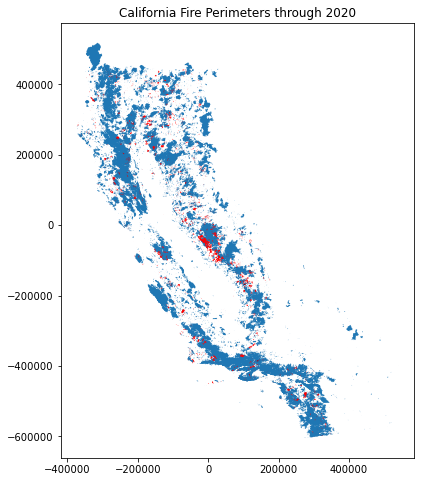

In [111]:
fig, ax = plt.subplots(figsize = (8, 8) ) ##ploting the wildfire polygons 

fire.plot(ax = ax, 
          label = 'Wild Fires',
         legend = True);
prescribed_burn.plot(ax =ax,
                     label = 'Prescribed Burns',
                     legend= True,
                     color = 'red',
                    zorder = 1 )
ax.set(title = 'California Fire Perimeters through 2020')

#not sure why the legend is not showing up on the plot

In [179]:
plt.close() #closing each figure before running code again due to RunTime warning more than 20 figures have been opened

In [112]:
fire

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602501,1.0,1.0,None,3252.523280,4.435447e+05,"MULTIPOLYGON (((-116841.251 97942.565, -116836..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,None,9653.760308,2.774464e+06,"MULTIPOLYGON (((-117328.400 90212.407, -117321..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,None,1649.643235,1.104811e+05,"MULTIPOLYGON (((-115605.059 92988.787, -115585..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931550,1.0,1.0,None,1577.155857,5.233211e+04,"MULTIPOLYGON (((-110213.270 105975.579, -11020..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315960,1.0,1.0,None,1035.787625,4.174722e+04,"MULTIPOLYGON (((-111793.600 164243.615, -11177..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21313,2019,CA,CCO,LAC,MUREAU,None,2019-10-30T00:00:00+00:00,2019-10-30T00:00:00+00:00,NaN,None,NaN,6.297734,NaN,1.0,None,741.886109,2.548602e+04,"MULTIPOLYGON (((122180.088 -428557.696, 122181..."
21314,2019,CA,LRA,None,OAK,None,2019-10-28T00:00:00+00:00,2019-10-28T00:00:00+00:00,14.0,NPS#596 Rapid ROS in light grassy 1yr old fuels,NaN,8.482671,8.0,1.0,None,1004.069271,3.432815e+04,"MULTIPOLYGON (((120221.043 -428836.863, 120220..."
21315,2019,CA,LRA,LDF,BARHAM,00000845,2019-11-09T00:00:00+00:00,2019-11-10T00:00:00+00:00,14.0,LACFD 0845,NaN,64.888229,8.0,1.0,None,3383.890106,2.625933e+05,"MULTIPOLYGON (((153212.742 -428811.823, 153216..."
21316,2019,CA,NPS,MNP,STAR,00013598,None,None,14.0,None,NaN,66.587181,8.0,1.0,None,3897.065019,2.694688e+05,"MULTIPOLYGON (((409025.711 -295687.235, 409021..."


In [113]:
total_acres = fire['GIS_ACRES'].sum() #total acres burned due to wildfires
total_acres

40007829.090682626

In [114]:
rx_burn_acres = prescribed_burn['GIS_ACRES'].sum() #total treated acres 
rx_burn_acres

1796396.9859081358

In [115]:
print('Wildfires burned a total of', round(total_acres), ' acres in CA through the year 2020')
print(round(rx_burn_acres),'is the total acrage treated with prescribed burns through the year 2020')

Wildfires burned a total of 40007829  acres in CA through the year 2020
1796397 is the total acrage treated with prescribed burns through the year 2020


Fire data was retrieved from: https://frap.fire.ca.gov/mapping/gis-data/

Note: This is a multi-agency statewide database of fire history. For CAL FIRE, timber fires 10 acres and greater, and grass fires 300 acres or greater are included. For the USFS, there is a 10 acre minimum for fires since 1950. 